# Linear regression

La finalidad de este proyecto es poder predecir el coste del seguro médico de una persona, en este caso se hará uso de la regresión lineal para poder realizar las predicciones. Antes se cargaran los datos que se utilizarán.

## Paso 1. Carga de Datos

In [2]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

## Paso 2. EDA
Para poder realizar el modelo de regresión lineal, primero se hará un análisis exploratorio de los datos.

In [3]:
train_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
train_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Nota: Al realizar el describe, se observa que se tienen variables de tipo object, en este caso es conveniente que sean de tipo
numérico para poder manejarlo de una forma más sencilla.
Los datos que vamos a transformar a numéricos son:

- sex
- smoker
- region

En el caso de las variables sex y smoker se trasformaran a 0 y 1, en el caso de sex se tendrá mujer= 0 y hombre=1, en el caso
de smoker (no=0 y yes=1).
Por otro lado, para la variable de region, se identificarán los valores únicos para, de igual forma, realizar una escala de acuerdo
a los diferentes valores:

In [6]:
# Se realiza el remplazo de las variables de la columna "sex"
train_data['sex'] = train_data['sex'].replace('male', 0)
train_data['sex'] = train_data['sex'].replace('female', 1)

/tmp/ipykernel_2455/3997442106.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['sex'] = train_data['sex'].replace('female', 1)


In [7]:
# Se realiza el remplazo de las variables de la columna "sex"
train_data['smoker'] = train_data['smoker'].replace('no', 0)
train_data['smoker'] = train_data['smoker'].replace('yes', 1)

/tmp/ipykernel_2455/213471927.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['smoker'] = train_data['smoker'].replace('yes', 1)


Ahora, se remplazan los valores de region:

In [8]:
train_data['region'] = train_data['region'].replace({'southwest': 1, 'southeast': 2, 'northwest':3, 'northeast':4})

/tmp/ipykernel_2455/2322302116.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['region'] = train_data['region'].replace({'southwest': 1, 'southeast': 2, 'northwest':3, 'northeast':4})


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


## Análisis univariable

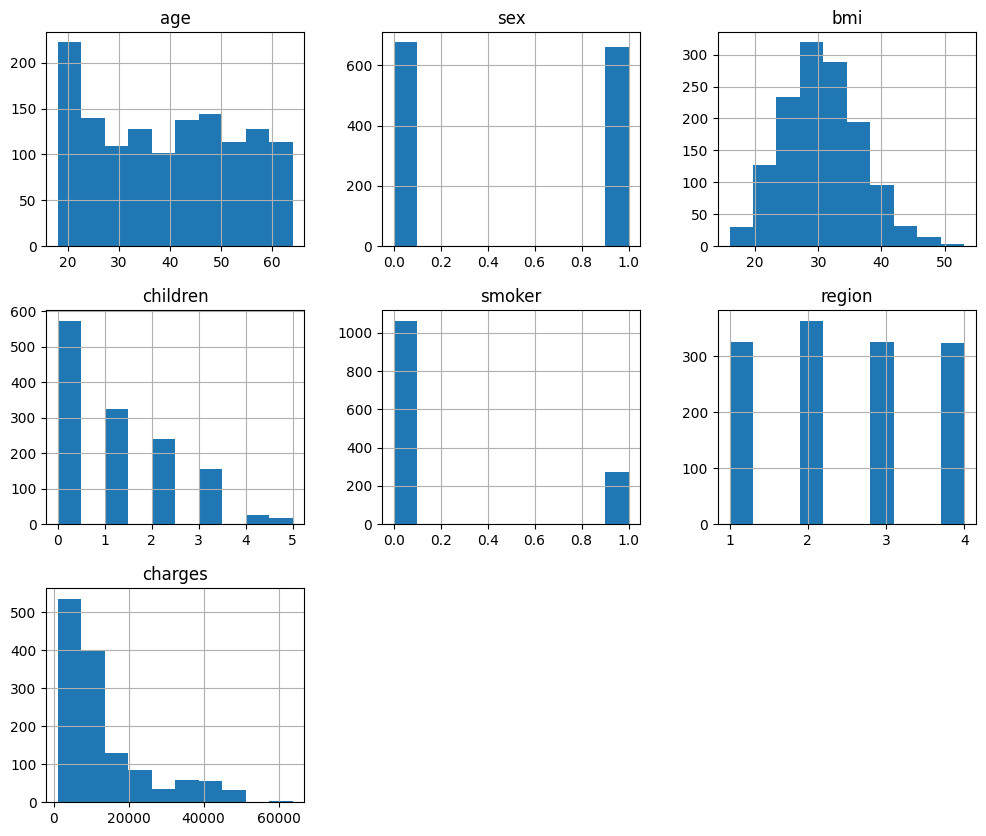

In [10]:
# Análisis univariado
import matplotlib.pyplot as plt


train_data.hist(figsize=(12,10))
plt.show()

En las gráficas anteriores, se puede observar que las variables BMI y Charges tienen valores outliers, por lo que se 
visualizarán de forma independiente:

<Axes: xlabel='charges'>

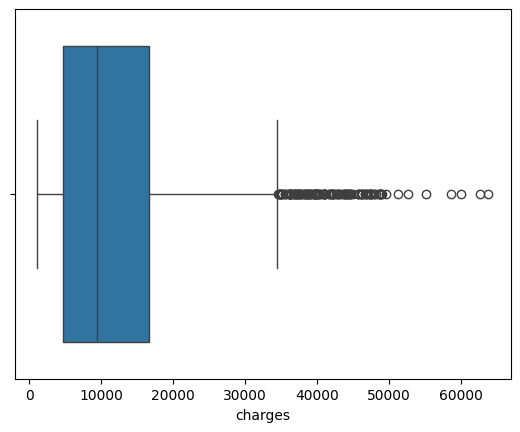

In [11]:
import seaborn as sns

sns.boxplot(x=train_data["charges"])

<Axes: xlabel='bmi'>

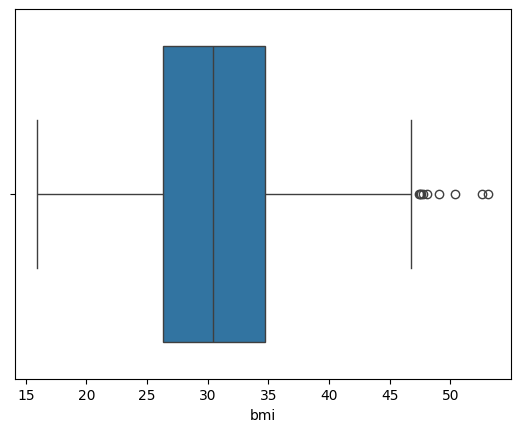

In [12]:
sns.boxplot(x=train_data["bmi"])

Se busca alguna relación entre las variables

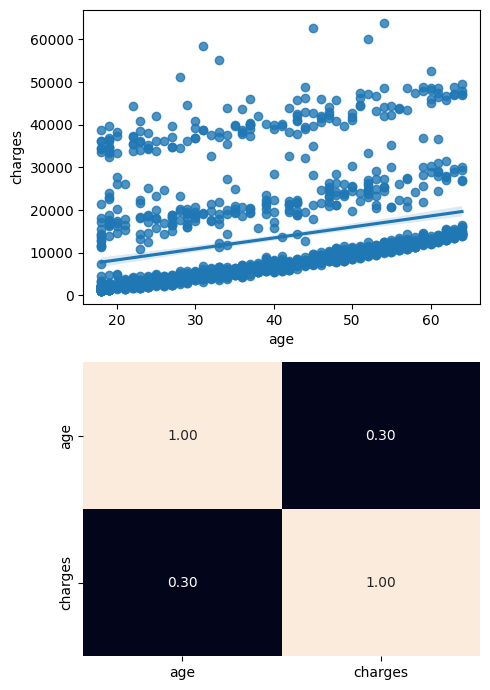

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))
#total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = train_data, x = "age", y = "charges")
sns.heatmap(train_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

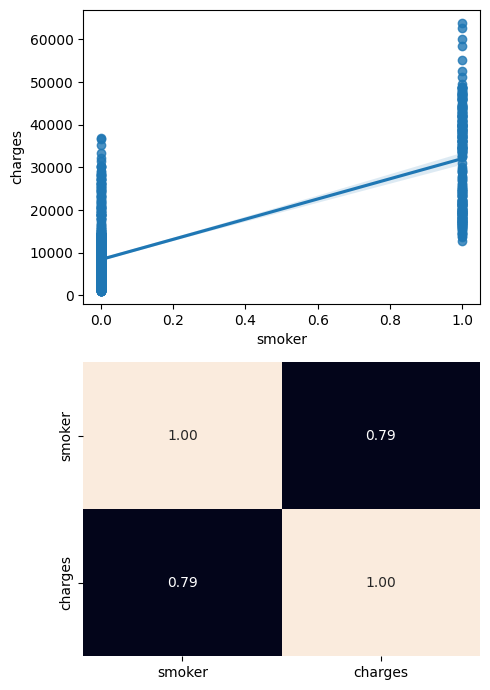

In [50]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = train_data, x = "smoker", y = "charges")
sns.heatmap(train_data[["smoker", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

Nota: Considerando la correlación de arriba, considero que sí tienen relevancia los outliers, pues se muentra una relación los
pacientes que pagarán más por un seguro médico y aquellos que fuman, lo que quiere decir, que las personas que fuman son las que pagan mucho más por el seguro.

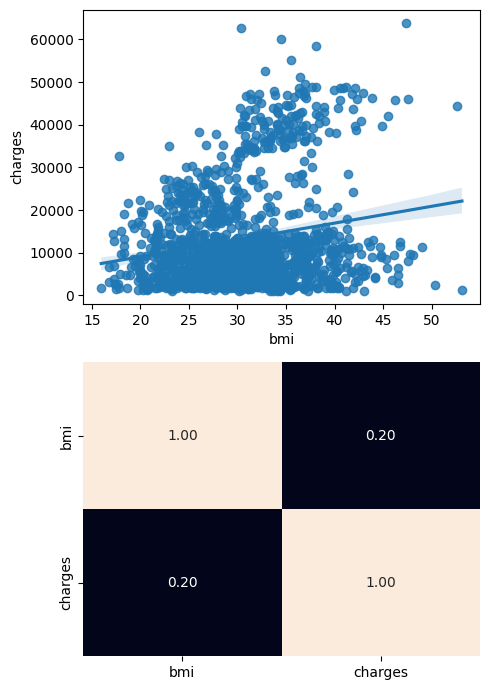

In [51]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = train_data, x = "bmi", y = "charges")
sns.heatmap(train_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

Nota: En el caso de esta correlación, se observa una correlación débil, sin embargo, tal vez, esten afectando los outliers.

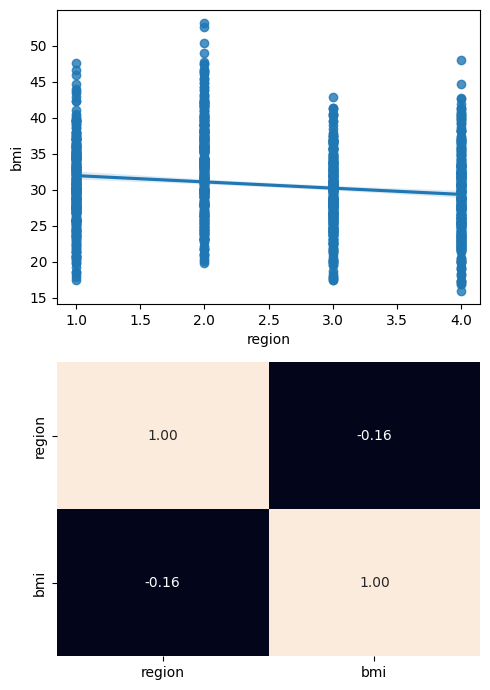

In [55]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = train_data, x = "region", y = "bmi")
sns.heatmap(train_data[["region", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

Nota: En el gráfico BMI vs Region, se puede observar una correlación débil negativa, lo que podría significar que entre más al sur, 
las personas muestran un leve aumento de BMI.

## Análisis Multivariable
Para realizar un análisis multivariable se usa una matriz de correlación, pero antes se realiza una normalización de los datos:

In [16]:
# Se eliminarán los

In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)

print(normalized_data)

           age  sex       bmi  children  smoker    region   charges
0     0.021739  1.0  0.321227       0.0     1.0  0.000000  0.251611
1     0.000000  0.0  0.479150       0.2     0.0  0.333333  0.009636
2     0.217391  0.0  0.458434       0.6     0.0  0.333333  0.053115
3     0.326087  0.0  0.181464       0.0     0.0  0.666667  0.333010
4     0.304348  0.0  0.347592       0.0     0.0  0.666667  0.043816
...        ...  ...       ...       ...     ...       ...       ...
1333  0.695652  0.0  0.403820       0.6     0.0  0.666667  0.151299
1334  0.000000  1.0  0.429379       0.0     0.0  1.000000  0.017305
1335  0.000000  1.0  0.562012       0.0     0.0  0.333333  0.008108
1336  0.065217  1.0  0.264730       0.0     0.0  0.000000  0.014144
1337  0.934783  1.0  0.352704       0.0     1.0  0.666667  0.447249

[1338 rows x 7 columns]


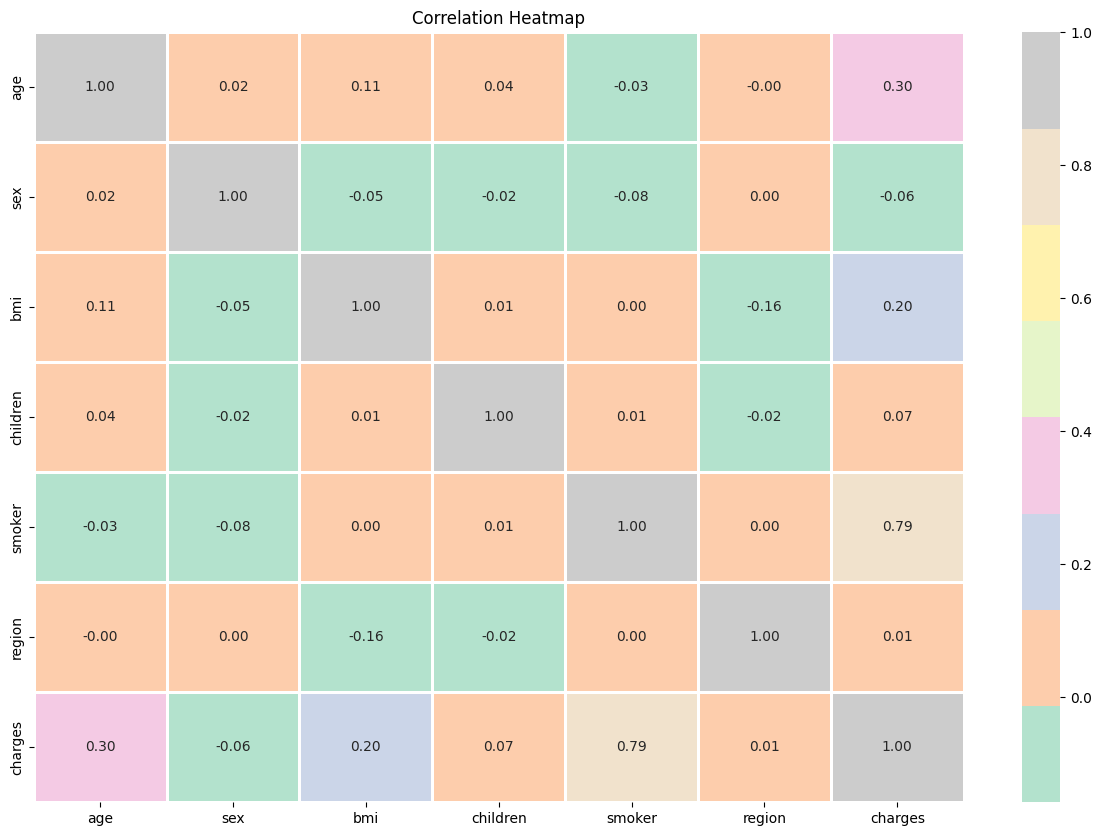

In [18]:
# Esta parte corresponde a visualizar la correlación entre las variables.
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_data.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Nota: En la tabla anterior se observar las correlaciones de las multivariables.

La tabla de correlaciones anterior, se puede corroborar con las siguientes gráficas:

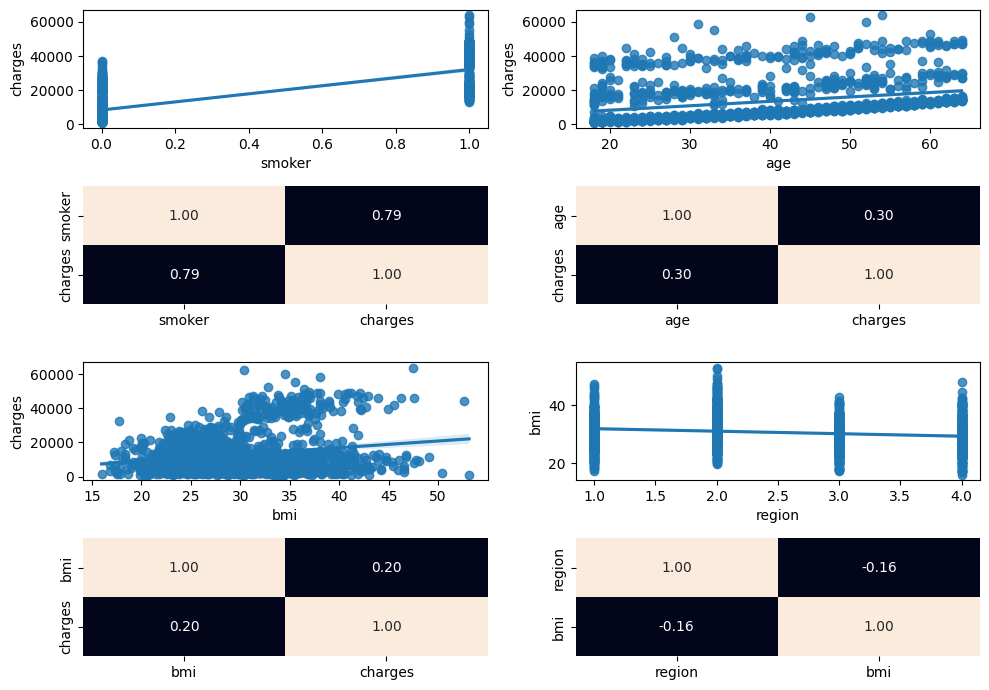

In [54]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = train_data, x = "smoker", y = "charges")
sns.heatmap(train_data[["smoker", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = train_data, x = "age", y = "charges")
sns.heatmap(train_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = train_data, x = "bmi", y = "charges")
sns.heatmap(train_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = train_data, x = "region", y = "bmi")
sns.heatmap(train_data[["region", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()

plt.show()

## Paso 3. Construir modelo de regresión lineal.


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = train_data.drop("charges", axis = 1)
y = train_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=7 is greater than n_features=6. All the features will be returned.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,sex,bmi,children,smoker,region
0,46.0,1.0,19.95,2.0,0.0,3.0
1,47.0,1.0,24.32,0.0,0.0,4.0
2,52.0,1.0,24.86,0.0,0.0,2.0
3,39.0,1.0,34.32,5.0,0.0,2.0
4,54.0,1.0,21.47,3.0,0.0,3.0


In [20]:
X_test_sel.head()

,age,sex,bmi,children,smoker,region
0,45.0,1.0,25.175,2.0,0.0,4.0
1,36.0,1.0,30.020,0.0,0.0,3.0
2,64.0,1.0,26.885,0.0,1.0,3.0
3,46.0,0.0,25.745,3.0,0.0,3.0
4,19.0,0.0,31.920,0.0,1.0,3.0


In [21]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/medical_insurance_cost_train.csv", index = False)
X_test_sel.to_csv("../data/processed/medical_insurance_cost_test.csv", index = False)

In [25]:
medical_insurance_train_data = pd.read_csv("../data/processed/medical_insurance_cost_train.csv")
medical_insurance_test_data = pd.read_csv("../data/processed/medical_insurance_cost_test.csv")

medical_insurance_train_data.head()

,age,sex,bmi,children,smoker,region,charges
0,46.0,1.0,19.95,2.0,0.0,3.0,9193.83850
1,47.0,1.0,24.32,0.0,0.0,4.0,8534.67180
2,52.0,1.0,24.86,0.0,0.0,2.0,27117.99378
3,39.0,1.0,34.32,5.0,0.0,2.0,8596.82780
4,54.0,1.0,21.47,3.0,0.0,3.0,12475.35130


In [26]:
from sklearn.linear_model import LinearRegression

linear_regresion_model = LinearRegression()
linear_regresion_model.fit(X_train, y_train)

LinearRegression()

In [27]:
print(f"Intercepto (a): {linear_regresion_model.intercept_}")
print(f"Coeficientes (b): {linear_regresion_model.coef_}")

Intercepto (a): -13050.535088002527
Coeficientes (b): [2.57056264e+02 1.87914567e+01 3.35781491e+02 4.25091456e+02
 2.36478181e+04 2.71284266e+02]


In [28]:
y_pred = linear_regresion_model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 33635210.431178406
Coeficiente de determinación: 0.7833463107364539
